# TD introduction au tidyverse

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

Warning message:
“package ‘readr’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Le jeu de données utilisé pour ce TD est `msleep`, un ensemble de données sur le sommeil des mammifères.

In [5]:
head(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


## Première partie : Visualisations graphiques avec ggplot2

1. Tracez l'histogramme de la variable `awake` (temps d'éveil par jour, en heures)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



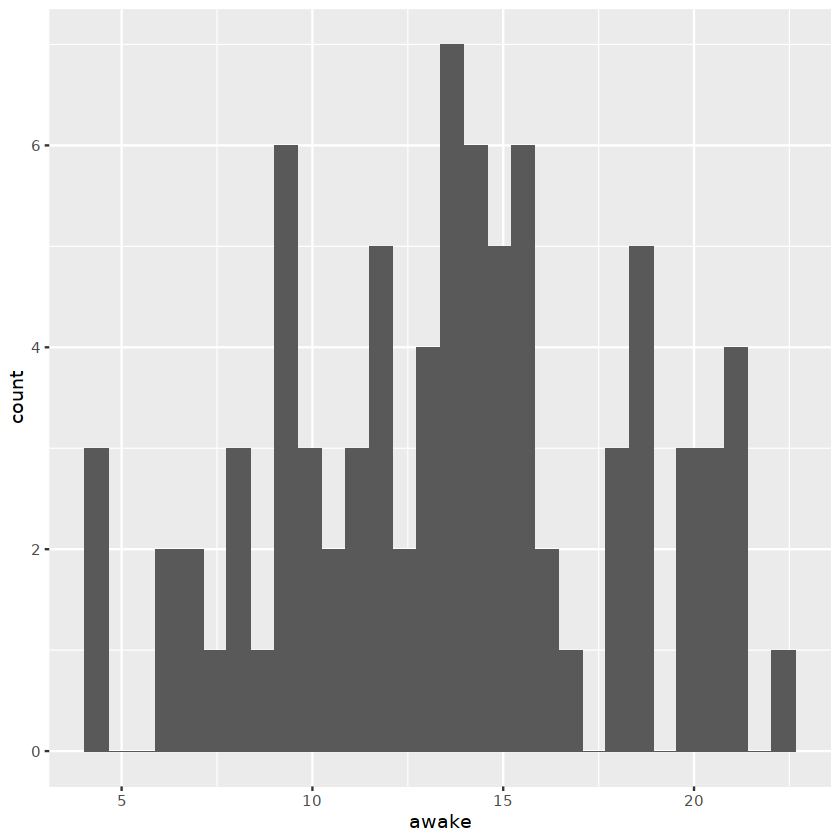

In [3]:
ggplot(msleep, mapping = aes(x = awake)) + geom_histogram()

2. Ajoutez l'information du régime alimentaire avec l'argument `fill = vore` dans aes(). Que constatez-vous ?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



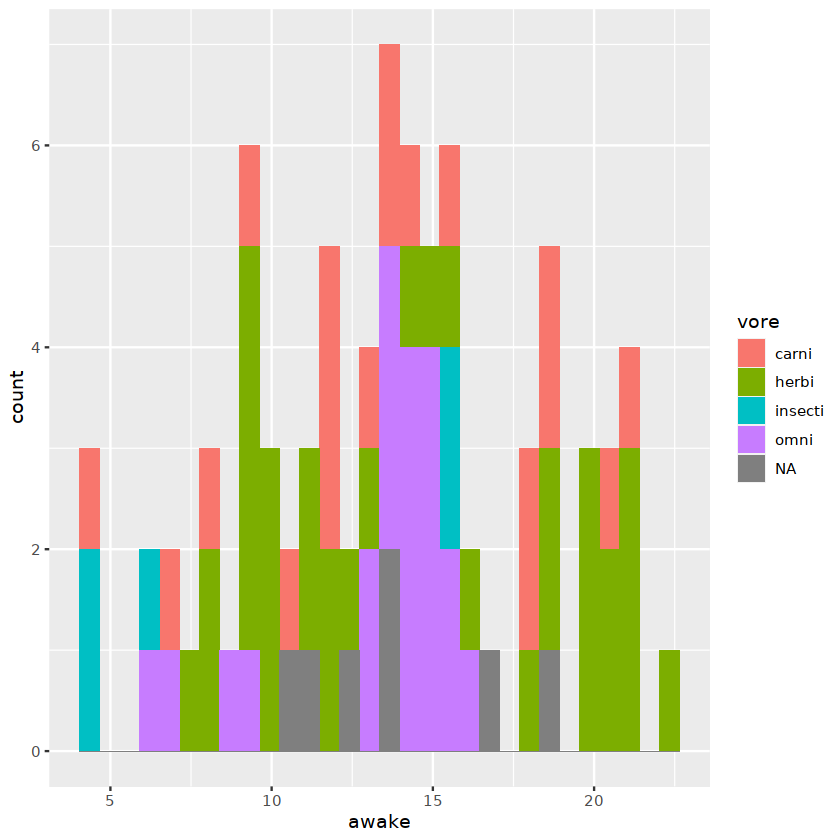

In [4]:
ggplot(msleep, mapping = aes(x = awake, fill = vore)) + geom_histogram()

3. Tracez la courbe de densité avec `geom_density` pour chaque catégorie de régime alimentaire avec `facet_wrap`

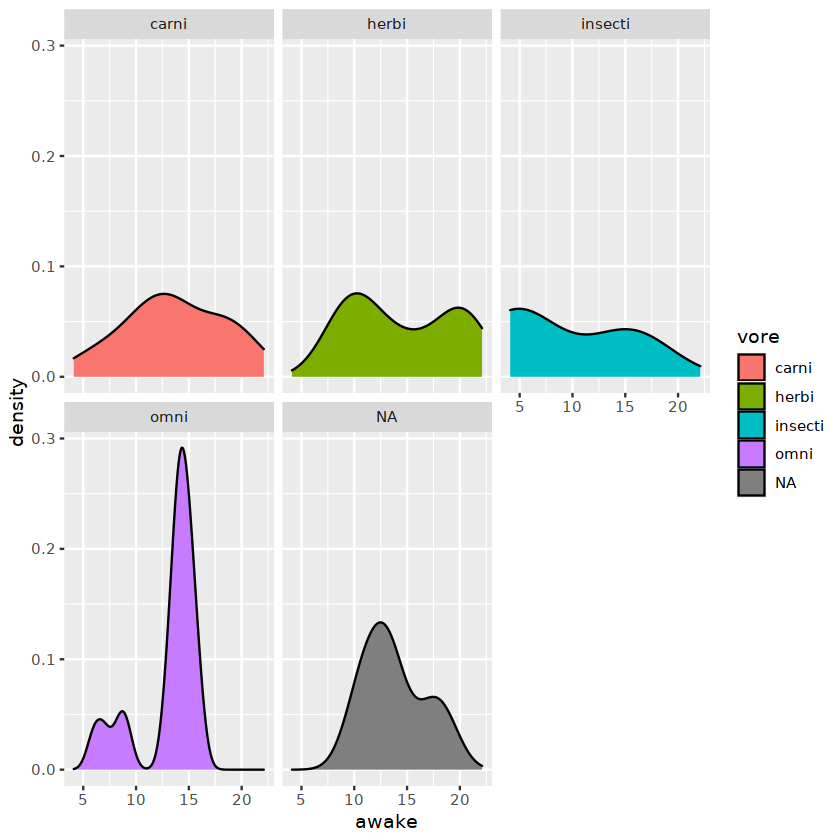

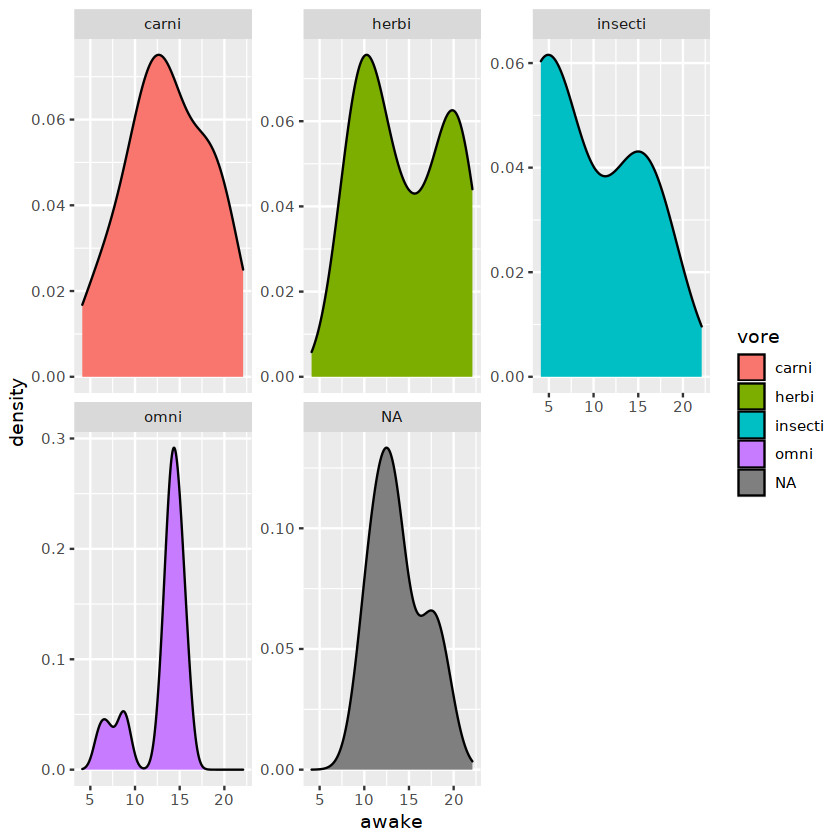

In [6]:
ggplot(msleep, mapping = aes(x = awake, fill = vore)) + geom_density() + facet_wrap(~vore)
ggplot(msleep, mapping = aes(x = awake, fill = vore)) + geom_density() + facet_wrap(~vore, scales = "free_y")

4. Tracez le nombre de mamifères appartenant à chaque régime alimentaire sous forme de barplot avec `geom_bar()`

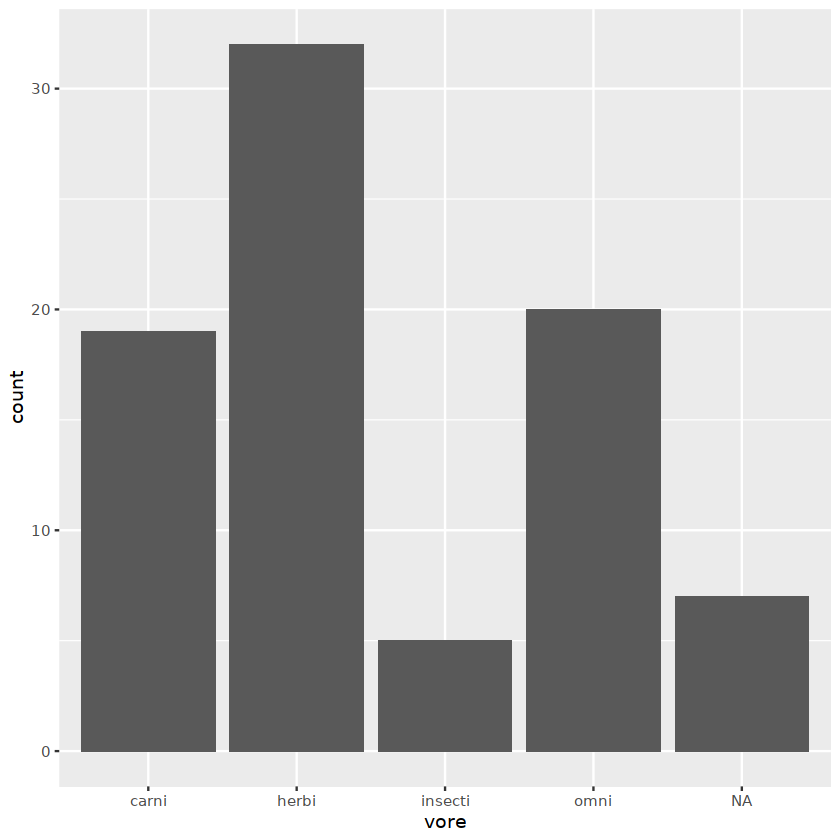

In [7]:
ggplot(msleep, mapping = aes(x = vore)) + geom_bar()

5. Ajoutez l'information concernant le statut de conservation de l'animal donné par la variable `conservation`

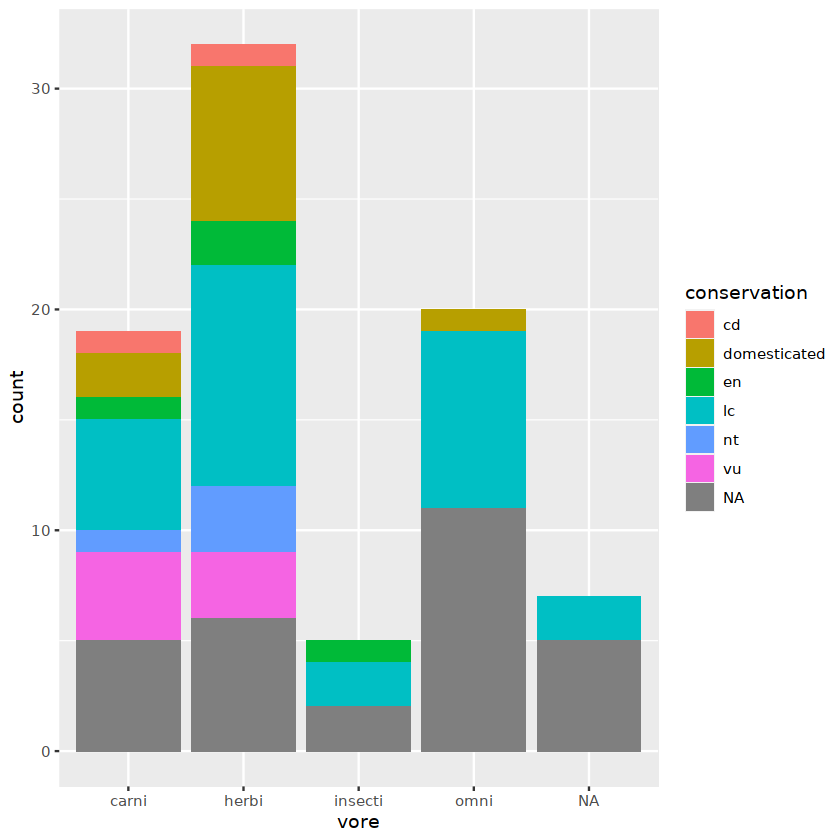

In [8]:
ggplot(msleep, mapping = aes(x = vore, fill = conservation)) + geom_bar()

6. Dans `geom_bar`, que change l'argument `position = "dodge"` ou bien `position = "fill"` ?

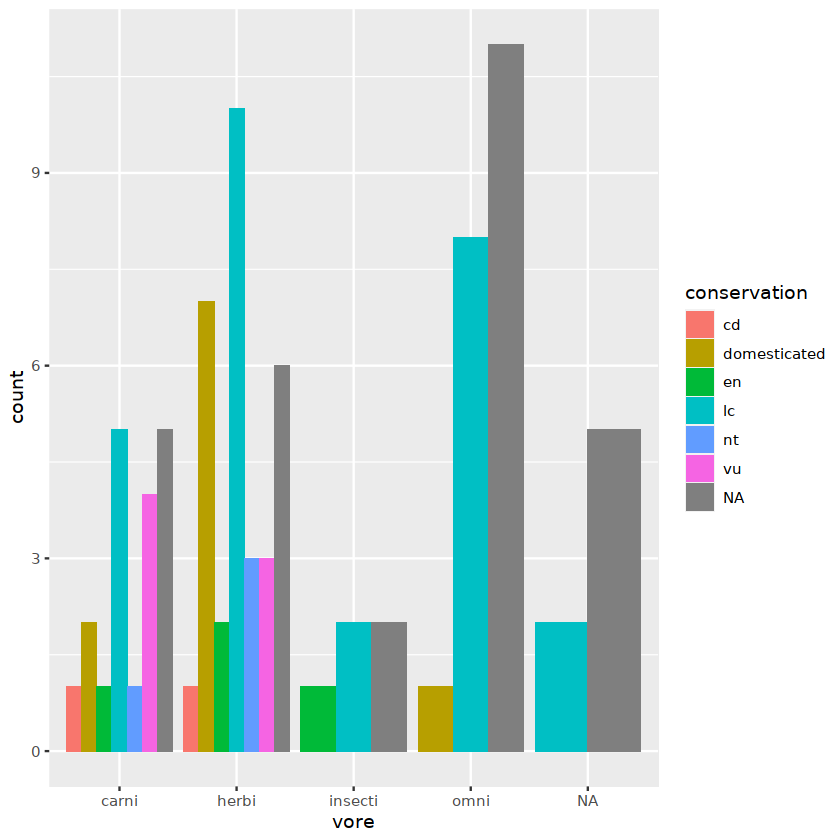

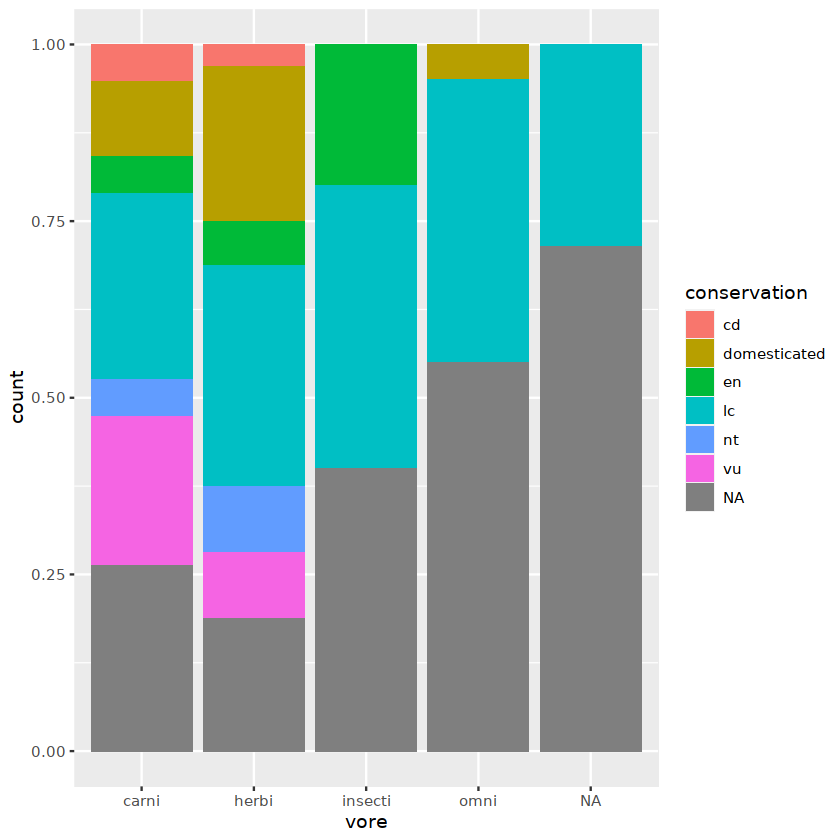

In [10]:
ggplot(msleep, mapping = aes(x = vore, fill = conservation)) + geom_bar(position = "dodge")
ggplot(msleep, mapping = aes(x = vore, fill = conservation)) + geom_bar(position = "fill")

7. Tracez le temps d'eveil (`awake`) en fonction du temps de sommeil paradoxal (`sleep_rem`)

Warning message:
“Removed 22 rows containing missing values (geom_point).”


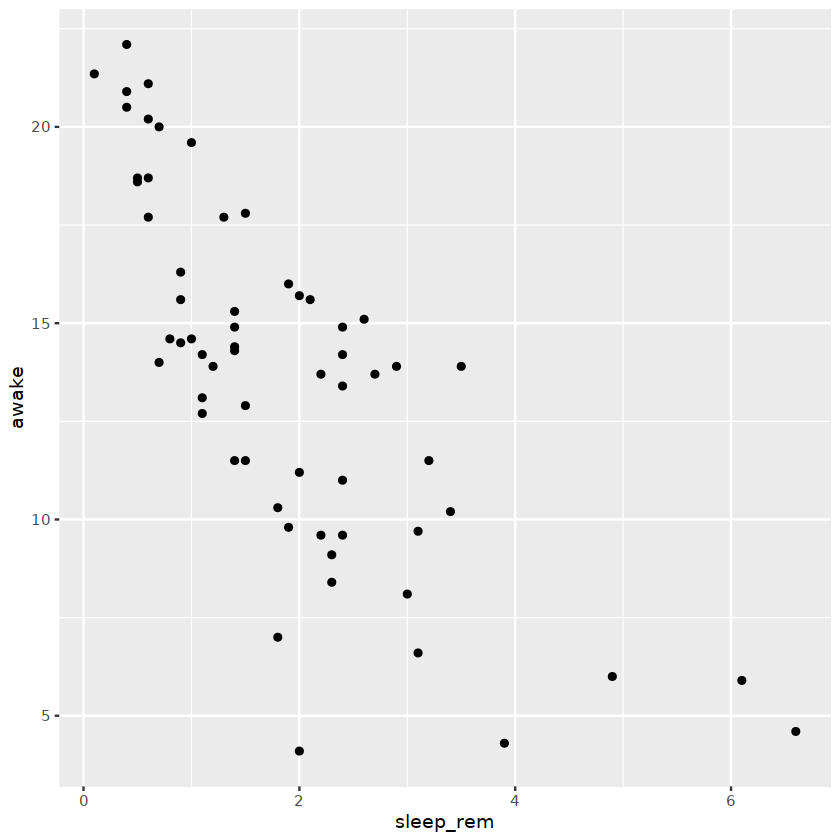

In [11]:
ggplot(msleep, mapping = aes(x = sleep_rem, y = awake)) + geom_point()

8. Améliorez le graphique en ajoutant l'information sur le régime alimentaire et sur du poids corporel (`bodywt` : body weight) avec les arguments `color` et `size`

Warning message:
“Removed 22 rows containing missing values (geom_point).”


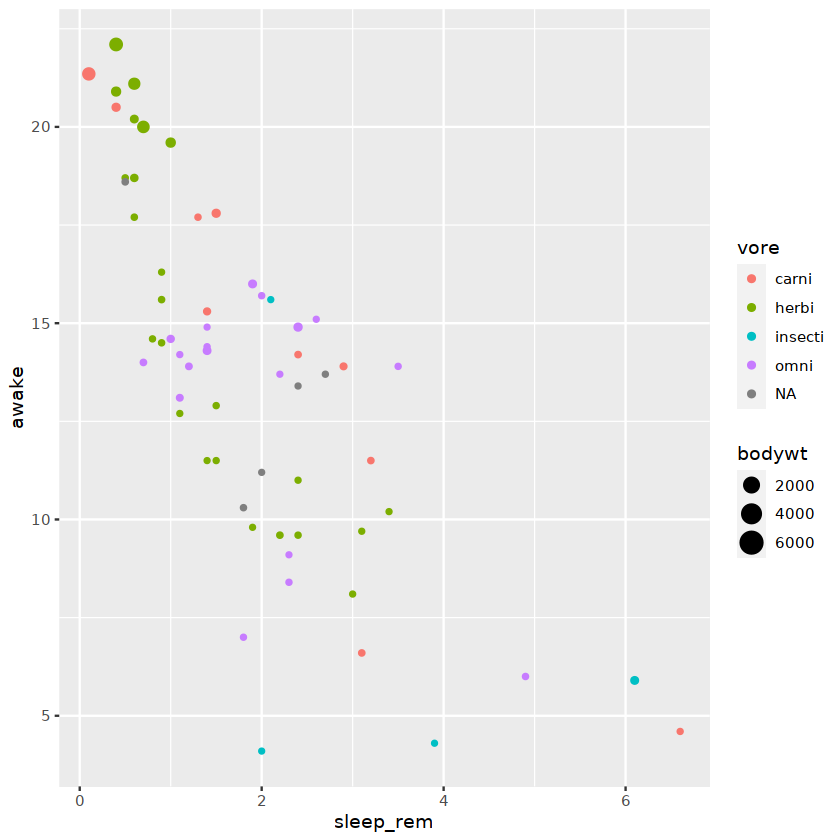

In [12]:
ggplot(msleep, mapping = aes(x = sleep_rem, y = awake, color = vore, size = bodywt)) + geom_point()

9. Tracez le poids du cerveau (`brainwt`) en fonction du temps de sommeil total (`sleep_total`). Le graphique est plus clair avec une échelle log pour l'axe des ordonnées (`scale_y_log10()`). Ajoutez une courbe de lissage avec `stat_smooth()`.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


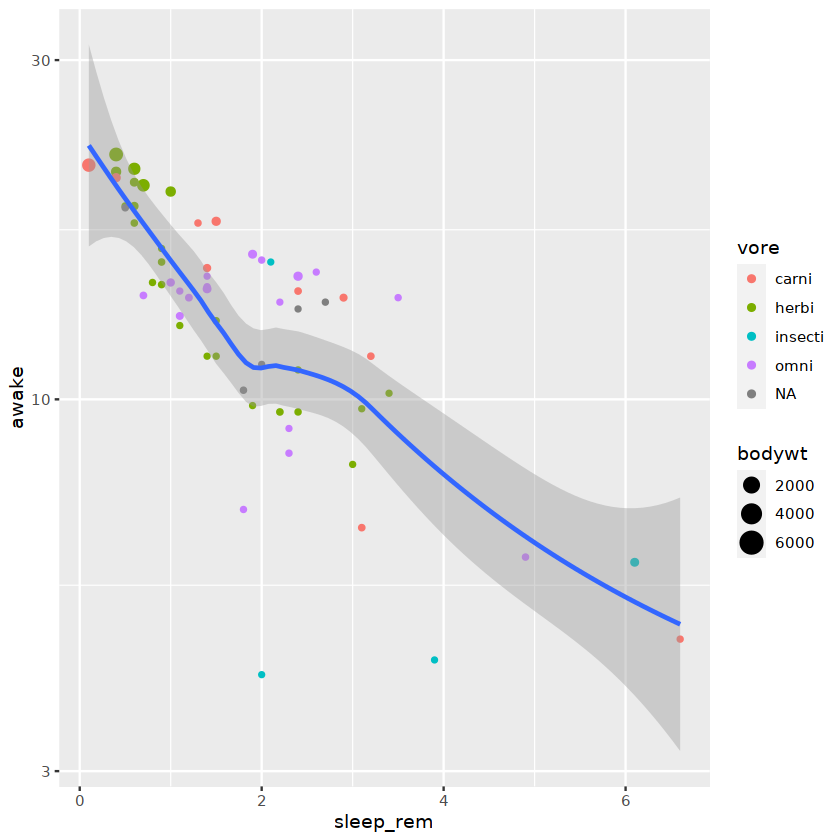

In [13]:
ggplot(msleep, mapping = aes(x = sleep_rem, y = awake)) + geom_point(aes(color = vore, size = bodywt)) + scale_y_log10() + stat_smooth()

10. Tracez les boxplots suivants avec `geom_boxplot`. Le titre du graphe se modifie avec `labs(title = "Titre du graphe")`, ceux des axes avec `xlab("label pour x")` et `ylab("label pour y")`

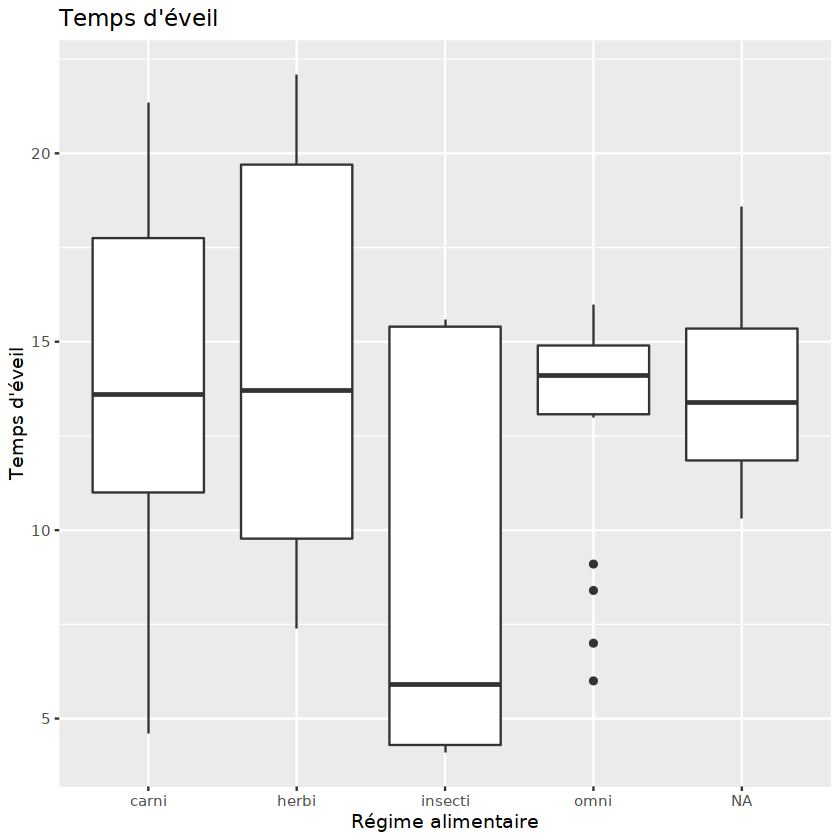

In [14]:
ggplot(msleep, mapping = aes(x = vore, y = awake)) + geom_boxplot() + 
labs(title = "Temps d'éveil") + 
xlab("Régime alimentaire") + 
ylab("Temps d'éveil") 

In [ ]:
ggsave(filename = "Boxplot.jpg")